In [2]:
# Check to see that we are using the GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# Amount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
gdrive_path = '/content/gdrive/My Drive/prj1_keypoints/'
# You can always ls:
!ls /content/gdrive/My\ Drive/prj1_keypoints

data_load.py		  mse_vs_batch_size.jpg   train_loss_batch64.npy
models_3layers_cnn.py	  test_keypoints.png	  train_loss_lr_1e-2.npy
models.py		  train_loss_3layers.npy  train_loss_lr_1e-2.pt
mse_dft_nn_structure.jpg  train_loss_4layers.npy  train_loss_lr_1e-4.npy
mse_learning_rate.jpg	  train_loss_batch10.npy


## 1. Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [0]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [0]:
import os

In [7]:
# We can save data into google drive and access them from here. But it is faster
# to clone a copy from git: 
!git clone https://github.com/udacity/P1_Facial_Keypoints.git

data_path = './P1_Facial_Keypoints/data'

Cloning into 'P1_Facial_Keypoints'...
remote: Enumerating objects: 5981, done.
remote: Total 5981 (delta 0), reused 0 (delta 0), pack-reused 5981
Receiving objects: 100% (5981/5981), 329.49 MiB | 42.87 MiB/s, done.
Resolving deltas: 100% (124/124), done.
Checking out files: 100% (5803/5803), done.


In [8]:
# Run the model definition code: 
# %run /content/gdrive/My\ Drive/prj1_keypoints/models_3layers_cnn.py
%run /content/gdrive/My\ Drive/prj1_keypoints/models.py
%run /content/gdrive/My\ Drive/prj1_keypoints/data_load.py

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [9]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you

#%load models.py
#from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout2d(p=0.1, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout2d(p=0.2, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop3): Dropout2d(p=0.3, inplace=False)
  (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop4): Dropout2d(p=0.4, inplace=False)
  (fc1): Linear(in_features=43264, out_features=256, bias=True)
  (drop5): Dropout2d(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (drop6): Dropout2d(p=0.6, inplace=False)
  (fc3): Linear(in_fe

## 2. Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [0]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# # the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
# # Since we have run the data_load.py, no need to load them again here. 

# from data_load import FacialKeypointsDataset
# # the transforms we defined in Notebook 1 are in the helper file `data_load.py`
# from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250), RandomCrop(224), Normalize(), ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [0]:
# import pandas as pd

# new_name = 'training_small_sample.csv'

# train_file = os.path.join(data_path, 'training_frames_keypoints.csv')
# df = pd.read_csv(train_file)

# n_samples = 10
# df_new = df.iloc[:n_samples, :]
# df_new.to_csv(os.path.join(data_path, new_name))

In [12]:
# create the transformed dataset
# transformed_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
#                                              root_dir='data/training/',
#                                              transform=data_transform)
transformed_dataset = FacialKeypointsDataset(csv_file=os.path.join(data_path, 'training_frames_keypoints.csv'),
                                             root_dir=os.path.join(data_path, 'training/'),
                                             transform=data_transform,
                                             n_samples=None)



print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


In [13]:
print(type(transformed_dataset.key_pts_frame))
transformed_dataset.key_pts_frame.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,125.0,62.0,130.0,66.0,134.0,73.0,136.0,81.0,139.0,92.0,134.0,96.0,130.0,98.0,126.0,102.0,120.0,102.0,111.0,104.0,105.0,104.0,99.0,102.0,90.0,51.0,89.0,56.0,87.0,60.0,...,68.0,119.0,73.0,117.0,77.0,115.0,79.0,117.0,81.0,115.0,85.0,117.0,90.0,117.0,87.0,122.0,85.0,124.0,81.0,124.0,77.0,124.0,73.0,121.0,70.0,119.0,77.0,119.0,79.0,119.0,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,119.0,58.0,130.0,64.0,136.0,73.0,141.0,85.0,143.0,96.0,137.0,102.0,131.0,107.0,124.0,109.0,114.0,111.0,105.0,111.0,97.0,111.0,88.0,111.0,78.0,51.0,83.0,56.0,81.0,62.0,...,70.0,122.0,75.0,122.0,81.0,120.0,83.0,120.0,85.0,120.0,90.0,120.0,94.0,120.0,90.0,124.0,87.0,126.0,83.0,126.0,79.0,126.0,75.0,124.0,70.0,122.0,79.0,122.0,83.0,122.0,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,103.0,60.0,111.0,62.0,116.0,67.0,122.0,75.0,127.0,86.0,127.0,96.0,123.0,105.0,121.0,113.0,114.0,118.0,106.0,122.0,100.0,124.0,91.0,128.0,81.0,58.0,56.0,62.0,54.0,67.0,...,67.0,103.0,69.0,101.0,73.0,101.0,75.0,101.0,77.0,101.0,84.0,103.0,88.0,108.0,82.0,110.0,77.0,110.0,75.0,110.0,71.0,110.0,69.0,107.0,67.0,103.0,73.0,103.0,75.0,105.0,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,132.0,61.0,141.0,64.0,148.0,73.0,157.0,85.0,163.0,101.0,163.0,116.0,164.0,128.0,161.0,137.0,155.0,144.0,143.0,150.0,134.0,156.0,121.0,162.0,109.0,70.0,68.0,76.0,65.0,85.0,...,76.0,129.0,82.0,130.0,88.0,127.0,91.0,130.0,98.0,130.0,104.0,133.0,110.0,139.0,101.0,142.0,95.0,145.0,88.0,142.0,82.0,142.0,79.0,139.0,76.0,129.0,85.0,133.0,91.0,133.0,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,130.0,71.0,136.0,75.0,138.0,81.0,141.0,92.0,143.0,105.0,139.0,113.0,135.0,122.0,129.0,126.0,122.0,128.0,112.0,130.0,103.0,130.0,95.0,130.0,86.0,58.0,81.0,60.0,74.0,64.0,...,75.0,121.0,79.0,117.0,84.0,115.0,86.0,115.0,90.0,113.0,96.0,115.0,103.0,118.0,98.0,122.0,92.0,124.0,88.0,124.0,84.0,126.0,79.0,124.0,77.0,121.0,84.0,117.0,88.0,117.0,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [0]:
# load training data in batches
# batch_size = 10
batch_size = 64

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [0]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
# test_dataset = FacialKeypointsDataset(csv_file='data/test_frames_keypoints.csv',
#                                              root_dir='data/test/',
#                                              transform=data_transform)

test_dataset = FacialKeypointsDataset(csv_file=os.path.join(data_path, 'test_frames_keypoints.csv'),
                                             root_dir=os.path.join(data_path, 'test/'),
                                             transform=data_transform)

In [0]:
# load test data in batches

# Let's just use the same batch size as the training dataset.
# batch_size = 10
# batch_size = 64

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## 3. Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Make sure the image is a FloatTensor, which the model expects.
3. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [0]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts            

In [20]:
#type(train_loader[0])
for i, sample in enumerate(train_loader):
    images = sample['image']
    key_pnts = sample['keypoints']

    if i == 0:
        break

/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


-1.6120512820512818
1.641652892561983


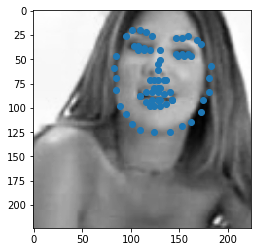

In [35]:
train_keypts = key_pnts.data.numpy()
ind = 0

# Display the range of key points x/y:
print(train_keypts[ind].min())
print(train_keypts[ind].max())
# Here is an untransform:
kpts2show = train_keypts[ind] * 50. + 100.

image = images[ind].data   # get the image from it's wrapper
image = image.numpy()   # convert to numpy array from a Tensor
image = np.transpose(image, (1, 2, 0)) 
image = np.squeeze(image)

plt.imshow(image, cmap='gray')
plt.scatter(kpts2show[:, 0], kpts2show[:, 1])

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [19]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([64, 1, 224, 224])
torch.Size([64, 68, 2])
torch.Size([64, 68, 2])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [0]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

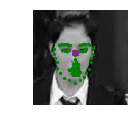

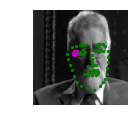

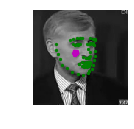

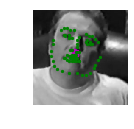

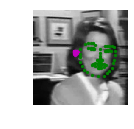

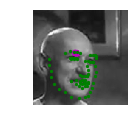

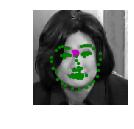

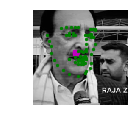

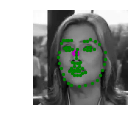

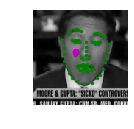

In [20]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

In [21]:
np_test_rst = test_outputs[0].data.numpy()
print(np_test_rst.max())
print(np_test_rst.min())

0.08321767
-0.10690868


In [27]:
print(gt_pts.max())
print(gt_pts.min())

tensor(2.8717, dtype=torch.float64)
tensor(-2.1421, dtype=torch.float64)


In [38]:
image = test_images[0].data   # get the image from it's wrapper
image = image.numpy()   # convert to numpy array from a Tensor
image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image
print(image.shape)

(224, 224, 1)


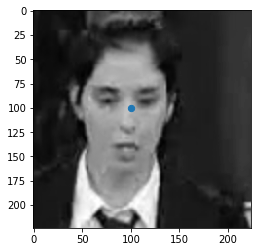

In [42]:
image = np.squeeze(image)

plt.imshow(image, cmap='gray')
plt.scatter(100, 100, s=40, marker='o')

## 4. Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [0]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss()

optimizer = optim.Adam(params=net.parameters(), lr=0.01)

## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [0]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()
    loss_list = []

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()
            
            # print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, loss.item()/1000))

            # print loss statistics
            # to convert loss into a scalar and add it to the running_loss, use .item()
            running_loss += loss.item()            
            loss_list.append(loss.item())

            if batch_i % 10 == 9:    # print every 10 batches
                file_name = '/content/gdrive/My Drive/prj1_keypoints/train_loss_lr_1e-2'
                np.save(file_name, np.array(loss_list))
                
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/1000))    
                running_loss = 0.0

            # file_name = '/content/gdrive/My Drive/prj1_keypoints/train_loss_3layers'
            # np.save(file_name, np.array(loss_list))               
            # print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/1000))    
            # running_loss = 0.0

        torch.save({
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'epoch': epoch,
            }, '/content/gdrive/My Drive/prj1_keypoints/train_loss_lr_1e-2.pt')
            
    return loss_list

In [0]:
# train your network
import datetime

t1 = datetime.datetime.now()

n_epochs = 100 # start small, and increase when you've decided on your model structure and hyperparams
loss_list = train_net(n_epochs)

t2 = datetime.datetime.now()
print("Training time: {}s".format(t2 - t1))

/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is de

Epoch: 1, Batch: 10, Avg. Loss: 0.004418715193867683
Epoch: 1, Batch: 20, Avg. Loss: 0.0021435351818799974
Epoch: 1, Batch: 30, Avg. Loss: 0.0023988150656223295
Epoch: 1, Batch: 40, Avg. Loss: 0.0019344750195741654
Epoch: 1, Batch: 50, Avg. Loss: 0.002157131537795067


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.001990592584013939
Epoch: 2, Batch: 20, Avg. Loss: 0.0020662536323070527
Epoch: 2, Batch: 30, Avg. Loss: 0.0020208133906126024
Epoch: 2, Batch: 40, Avg. Loss: 0.0018607168197631837
Epoch: 2, Batch: 50, Avg. Loss: 0.0021240517050027845


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.0020464871674776078
Epoch: 3, Batch: 20, Avg. Loss: 0.001930871844291687
Epoch: 3, Batch: 30, Avg. Loss: 0.0017923492342233657
Epoch: 3, Batch: 40, Avg. Loss: 0.0022187650799751282
Epoch: 3, Batch: 50, Avg. Loss: 0.002255033105611801


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.002167435184121132
Epoch: 4, Batch: 20, Avg. Loss: 0.002140852838754654
Epoch: 4, Batch: 30, Avg. Loss: 0.0019156479984521865
Epoch: 4, Batch: 40, Avg. Loss: 0.0019104976952075959
Epoch: 4, Batch: 50, Avg. Loss: 0.0020012964606285094


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.0019444088488817215
Epoch: 5, Batch: 20, Avg. Loss: 0.0021653550416231154
Epoch: 5, Batch: 30, Avg. Loss: 0.001878908857703209
Epoch: 5, Batch: 40, Avg. Loss: 0.0018852254301309586
Epoch: 5, Batch: 50, Avg. Loss: 0.00206564936041832


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.0019482792168855666
Epoch: 6, Batch: 20, Avg. Loss: 0.0020984525084495544
Epoch: 6, Batch: 30, Avg. Loss: 0.0020751726925373076
Epoch: 6, Batch: 40, Avg. Loss: 0.0018827272057533263
Epoch: 6, Batch: 50, Avg. Loss: 0.0018979140520095825


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.001856824964284897
Epoch: 7, Batch: 20, Avg. Loss: 0.002224280521273613
Epoch: 7, Batch: 30, Avg. Loss: 0.001916054293513298
Epoch: 7, Batch: 40, Avg. Loss: 0.0018420893102884292
Epoch: 7, Batch: 50, Avg. Loss: 0.0022843030244112015


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.0021567961424589156
Epoch: 8, Batch: 20, Avg. Loss: 0.0019247080981731415
Epoch: 8, Batch: 30, Avg. Loss: 0.0020934314280748366
Epoch: 8, Batch: 40, Avg. Loss: 0.0019269129931926727
Epoch: 8, Batch: 50, Avg. Loss: 0.00194315804541111


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.0018654284030199051
Epoch: 9, Batch: 20, Avg. Loss: 0.0021832479387521742
Epoch: 9, Batch: 30, Avg. Loss: 0.002267280951142311
Epoch: 9, Batch: 40, Avg. Loss: 0.001715609535574913
Epoch: 9, Batch: 50, Avg. Loss: 0.0020546068847179413


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.0020130873322486875
Epoch: 10, Batch: 20, Avg. Loss: 0.0022449216693639757
Epoch: 10, Batch: 30, Avg. Loss: 0.0019183854758739471
Epoch: 10, Batch: 40, Avg. Loss: 0.0017999629378318786
Epoch: 10, Batch: 50, Avg. Loss: 0.0020467054694890976


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 10, Avg. Loss: 0.001970724910497665
Epoch: 11, Batch: 20, Avg. Loss: 0.0022723615616559983
Epoch: 11, Batch: 30, Avg. Loss: 0.002131933093070984
Epoch: 11, Batch: 40, Avg. Loss: 0.0017802268266677856
Epoch: 11, Batch: 50, Avg. Loss: 0.001928387686610222


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 10, Avg. Loss: 0.002035407155752182
Epoch: 12, Batch: 20, Avg. Loss: 0.0019263243228197099
Epoch: 12, Batch: 30, Avg. Loss: 0.002001567006111145
Epoch: 12, Batch: 40, Avg. Loss: 0.001829361453652382
Epoch: 12, Batch: 50, Avg. Loss: 0.0019348218142986298


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 10, Avg. Loss: 0.0019747987538576125
Epoch: 13, Batch: 20, Avg. Loss: 0.002006337270140648
Epoch: 13, Batch: 30, Avg. Loss: 0.0021225695461034775
Epoch: 13, Batch: 40, Avg. Loss: 0.0022145555019378663
Epoch: 13, Batch: 50, Avg. Loss: 0.0020158613622188568


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 10, Avg. Loss: 0.002026460826396942
Epoch: 14, Batch: 20, Avg. Loss: 0.002029487118124962
Epoch: 14, Batch: 30, Avg. Loss: 0.002017692491412163
Epoch: 14, Batch: 40, Avg. Loss: 0.0018138912618160248
Epoch: 14, Batch: 50, Avg. Loss: 0.0020046917498111726


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 10, Avg. Loss: 0.0020929594933986662
Epoch: 15, Batch: 20, Avg. Loss: 0.0018739543408155441
Epoch: 15, Batch: 30, Avg. Loss: 0.0019590481370687484
Epoch: 15, Batch: 40, Avg. Loss: 0.0017987751811742783
Epoch: 15, Batch: 50, Avg. Loss: 0.001897654503583908


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 16, Batch: 10, Avg. Loss: 0.0021241603046655653
Epoch: 16, Batch: 20, Avg. Loss: 0.0020623882412910462
Epoch: 16, Batch: 30, Avg. Loss: 0.0018560151308774947
Epoch: 16, Batch: 40, Avg. Loss: 0.0018935191184282303
Epoch: 16, Batch: 50, Avg. Loss: 0.0019281354397535325


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 17, Batch: 10, Avg. Loss: 0.0021545160114765168
Epoch: 17, Batch: 20, Avg. Loss: 0.002001260444521904
Epoch: 17, Batch: 30, Avg. Loss: 0.002053417846560478
Epoch: 17, Batch: 40, Avg. Loss: 0.0020134248584508896
Epoch: 17, Batch: 50, Avg. Loss: 0.0019102528244256973


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 18, Batch: 10, Avg. Loss: 0.002014699101448059
Epoch: 18, Batch: 20, Avg. Loss: 0.001871146559715271
Epoch: 18, Batch: 30, Avg. Loss: 0.0021432109773159027
Epoch: 18, Batch: 40, Avg. Loss: 0.0019337062537670136
Epoch: 18, Batch: 50, Avg. Loss: 0.0020348623096942903


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 19, Batch: 10, Avg. Loss: 0.0019359671920537948
Epoch: 19, Batch: 20, Avg. Loss: 0.0019104442745447158
Epoch: 19, Batch: 30, Avg. Loss: 0.001992267429828644
Epoch: 19, Batch: 40, Avg. Loss: 0.0019095364660024644
Epoch: 19, Batch: 50, Avg. Loss: 0.001975014328956604


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 20, Batch: 10, Avg. Loss: 0.0018106198906898499
Epoch: 20, Batch: 20, Avg. Loss: 0.0019620151668787
Epoch: 20, Batch: 30, Avg. Loss: 0.0019175187349319458
Epoch: 20, Batch: 40, Avg. Loss: 0.0019050780981779097
Epoch: 20, Batch: 50, Avg. Loss: 0.0018629949986934662


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 21, Batch: 10, Avg. Loss: 0.001865039572119713
Epoch: 21, Batch: 20, Avg. Loss: 0.0021571979224681856
Epoch: 21, Batch: 30, Avg. Loss: 0.0020020171403884886
Epoch: 21, Batch: 40, Avg. Loss: 0.0018603680282831192
Epoch: 21, Batch: 50, Avg. Loss: 0.0019549514800310135


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 22, Batch: 10, Avg. Loss: 0.00201737742125988
Epoch: 22, Batch: 20, Avg. Loss: 0.0019224031418561935
Epoch: 22, Batch: 30, Avg. Loss: 0.0019458454996347427
Epoch: 22, Batch: 40, Avg. Loss: 0.0019287404716014861
Epoch: 22, Batch: 50, Avg. Loss: 0.0020320750176906588


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 23, Batch: 10, Avg. Loss: 0.001829147771000862
Epoch: 23, Batch: 20, Avg. Loss: 0.0021926538944244383
Epoch: 23, Batch: 30, Avg. Loss: 0.0020910822749137877
Epoch: 23, Batch: 40, Avg. Loss: 0.001763964906334877
Epoch: 23, Batch: 50, Avg. Loss: 0.001936361089348793


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 24, Batch: 10, Avg. Loss: 0.001946825236082077
Epoch: 24, Batch: 20, Avg. Loss: 0.002113043427467346
Epoch: 24, Batch: 30, Avg. Loss: 0.0020752956569194793
Epoch: 24, Batch: 40, Avg. Loss: 0.0019066264480352402
Epoch: 24, Batch: 50, Avg. Loss: 0.0020487397611141205


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 25, Batch: 10, Avg. Loss: 0.0019450102895498275
Epoch: 25, Batch: 20, Avg. Loss: 0.0020824557840824127
Epoch: 25, Batch: 30, Avg. Loss: 0.002220922961831093
Epoch: 25, Batch: 40, Avg. Loss: 0.0018615079075098037
Epoch: 25, Batch: 50, Avg. Loss: 0.0020524671375751497


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 26, Batch: 10, Avg. Loss: 0.00187498040497303
Epoch: 26, Batch: 20, Avg. Loss: 0.0018267265558242797
Epoch: 26, Batch: 30, Avg. Loss: 0.0020650587379932406
Epoch: 26, Batch: 40, Avg. Loss: 0.0020032767057418825
Epoch: 26, Batch: 50, Avg. Loss: 0.0019571920931339263


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 27, Batch: 10, Avg. Loss: 0.002428007438778877
Epoch: 27, Batch: 20, Avg. Loss: 0.002010376751422882
Epoch: 27, Batch: 30, Avg. Loss: 0.00198828986287117
Epoch: 27, Batch: 40, Avg. Loss: 0.0019156980365514756
Epoch: 27, Batch: 50, Avg. Loss: 0.002033195570111275


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 28, Batch: 10, Avg. Loss: 0.0018677083402872086
Epoch: 28, Batch: 20, Avg. Loss: 0.001848889723420143
Epoch: 28, Batch: 30, Avg. Loss: 0.002087838754057884
Epoch: 28, Batch: 40, Avg. Loss: 0.002017028197646141
Epoch: 28, Batch: 50, Avg. Loss: 0.002008393421769142


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 29, Batch: 10, Avg. Loss: 0.0018452416360378266
Epoch: 29, Batch: 20, Avg. Loss: 0.0023178596794605254
Epoch: 29, Batch: 30, Avg. Loss: 0.002147690713405609
Epoch: 29, Batch: 40, Avg. Loss: 0.0019480227082967758
Epoch: 29, Batch: 50, Avg. Loss: 0.0020311524122953416


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 30, Batch: 10, Avg. Loss: 0.0019344307482242584
Epoch: 30, Batch: 20, Avg. Loss: 0.0019687682539224626
Epoch: 30, Batch: 30, Avg. Loss: 0.001840459793806076
Epoch: 30, Batch: 40, Avg. Loss: 0.0018067245632410048
Epoch: 30, Batch: 50, Avg. Loss: 0.0022589994817972183


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 31, Batch: 10, Avg. Loss: 0.0018737460225820542
Epoch: 31, Batch: 20, Avg. Loss: 0.0019198323786258698
Epoch: 31, Batch: 30, Avg. Loss: 0.0019953000396490095
Epoch: 31, Batch: 40, Avg. Loss: 0.0018084875196218491
Epoch: 31, Batch: 50, Avg. Loss: 0.0019470065534114838


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 32, Batch: 10, Avg. Loss: 0.0018183277398347855
Epoch: 32, Batch: 20, Avg. Loss: 0.002134634256362915
Epoch: 32, Batch: 30, Avg. Loss: 0.00209349100291729
Epoch: 32, Batch: 40, Avg. Loss: 0.0018994751423597337
Epoch: 32, Batch: 50, Avg. Loss: 0.002054798066616058


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 33, Batch: 10, Avg. Loss: 0.0021359223276376724
Epoch: 33, Batch: 20, Avg. Loss: 0.002648177072405815
Epoch: 33, Batch: 30, Avg. Loss: 0.0020167808681726455
Epoch: 33, Batch: 40, Avg. Loss: 0.0017940966039896012
Epoch: 33, Batch: 50, Avg. Loss: 0.001915700763463974


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 34, Batch: 10, Avg. Loss: 0.001916314497590065
Epoch: 34, Batch: 20, Avg. Loss: 0.0018212206214666367
Epoch: 34, Batch: 30, Avg. Loss: 0.001827796757221222
Epoch: 34, Batch: 40, Avg. Loss: 0.0019426457434892654
Epoch: 34, Batch: 50, Avg. Loss: 0.0018977410569787025


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 35, Batch: 10, Avg. Loss: 0.0017859001904726027
Epoch: 35, Batch: 20, Avg. Loss: 0.0019210638105869294
Epoch: 35, Batch: 30, Avg. Loss: 0.0020222077667713164
Epoch: 35, Batch: 40, Avg. Loss: 0.0019160458445549012
Epoch: 35, Batch: 50, Avg. Loss: 0.0018650552034378052


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 36, Batch: 10, Avg. Loss: 0.0020461906343698503
Epoch: 36, Batch: 20, Avg. Loss: 0.0022550747990608216
Epoch: 36, Batch: 30, Avg. Loss: 0.002051925614476204
Epoch: 36, Batch: 40, Avg. Loss: 0.002045659586787224
Epoch: 36, Batch: 50, Avg. Loss: 0.0018711837381124496


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 37, Batch: 10, Avg. Loss: 0.002027391418814659
Epoch: 37, Batch: 20, Avg. Loss: 0.0019891726076602936
Epoch: 37, Batch: 30, Avg. Loss: 0.0019196207821369172
Epoch: 37, Batch: 40, Avg. Loss: 0.0018355835750699042
Epoch: 37, Batch: 50, Avg. Loss: 0.0019144328385591507


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 38, Batch: 10, Avg. Loss: 0.001916272796690464
Epoch: 38, Batch: 20, Avg. Loss: 0.0019682752341032028
Epoch: 38, Batch: 30, Avg. Loss: 0.002191228672862053
Epoch: 38, Batch: 40, Avg. Loss: 0.0018691665083169938
Epoch: 38, Batch: 50, Avg. Loss: 0.001954516887664795


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 39, Batch: 10, Avg. Loss: 0.0020175257325172422
Epoch: 39, Batch: 20, Avg. Loss: 0.0019204406440258026
Epoch: 39, Batch: 30, Avg. Loss: 0.0019543921500444414
Epoch: 39, Batch: 40, Avg. Loss: 0.0020302997678518296
Epoch: 39, Batch: 50, Avg. Loss: 0.0019249026477336883


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 40, Batch: 10, Avg. Loss: 0.001987519398331642
Epoch: 40, Batch: 20, Avg. Loss: 0.0018478661477565766
Epoch: 40, Batch: 30, Avg. Loss: 0.0020364158004522325
Epoch: 40, Batch: 40, Avg. Loss: 0.0018671231716871262
Epoch: 40, Batch: 50, Avg. Loss: 0.001986582413315773


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 41, Batch: 10, Avg. Loss: 0.0019192919433116912
Epoch: 41, Batch: 20, Avg. Loss: 0.0020007464438676834
Epoch: 41, Batch: 30, Avg. Loss: 0.0018464817851781845
Epoch: 41, Batch: 40, Avg. Loss: 0.002036291003227234
Epoch: 41, Batch: 50, Avg. Loss: 0.002052490904927254


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 42, Batch: 10, Avg. Loss: 0.0019261895418167115
Epoch: 42, Batch: 20, Avg. Loss: 0.0021591147631406784
Epoch: 42, Batch: 30, Avg. Loss: 0.0018172756731510162
Epoch: 42, Batch: 40, Avg. Loss: 0.0019599398970603942
Epoch: 42, Batch: 50, Avg. Loss: 0.0019622085243463515


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 43, Batch: 10, Avg. Loss: 0.002035134628415108
Epoch: 43, Batch: 20, Avg. Loss: 0.0019303750991821289
Epoch: 43, Batch: 30, Avg. Loss: 0.0019785055220127106
Epoch: 43, Batch: 40, Avg. Loss: 0.0018984844833612442
Epoch: 43, Batch: 50, Avg. Loss: 0.0020096355974674224


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 44, Batch: 10, Avg. Loss: 0.0019009679853916168
Epoch: 44, Batch: 20, Avg. Loss: 0.001972370371222496
Epoch: 44, Batch: 30, Avg. Loss: 0.0020336543321609495
Epoch: 44, Batch: 40, Avg. Loss: 0.002096427172422409
Epoch: 44, Batch: 50, Avg. Loss: 0.00185731041431427


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 45, Batch: 10, Avg. Loss: 0.002032099664211273
Epoch: 45, Batch: 20, Avg. Loss: 0.0019350828975439071
Epoch: 45, Batch: 30, Avg. Loss: 0.0019713334888219834
Epoch: 45, Batch: 40, Avg. Loss: 0.0017702839225530625
Epoch: 45, Batch: 50, Avg. Loss: 0.002234902039170265


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 46, Batch: 10, Avg. Loss: 0.001969422608613968
Epoch: 46, Batch: 20, Avg. Loss: 0.001867841750383377
Epoch: 46, Batch: 30, Avg. Loss: 0.001903452381491661
Epoch: 46, Batch: 40, Avg. Loss: 0.0017331206798553466
Epoch: 46, Batch: 50, Avg. Loss: 0.0022077140659093855


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 47, Batch: 10, Avg. Loss: 0.0018589805960655213
Epoch: 47, Batch: 20, Avg. Loss: 0.0021126123666763306
Epoch: 47, Batch: 30, Avg. Loss: 0.002420393779873848
Epoch: 47, Batch: 40, Avg. Loss: 0.001962406113743782
Epoch: 47, Batch: 50, Avg. Loss: 0.0019677454084157946


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 48, Batch: 10, Avg. Loss: 0.0017363550662994386
Epoch: 48, Batch: 20, Avg. Loss: 0.0020556273460388182
Epoch: 48, Batch: 30, Avg. Loss: 0.002226855933666229
Epoch: 48, Batch: 40, Avg. Loss: 0.0019306118339300156
Epoch: 48, Batch: 50, Avg. Loss: 0.001889318510890007


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 49, Batch: 10, Avg. Loss: 0.002109672203660011
Epoch: 49, Batch: 20, Avg. Loss: 0.0019185605347156525
Epoch: 49, Batch: 30, Avg. Loss: 0.0019846499115228652
Epoch: 49, Batch: 40, Avg. Loss: 0.0018418392688035964
Epoch: 49, Batch: 50, Avg. Loss: 0.0021984835863113404


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 50, Batch: 10, Avg. Loss: 0.002005377322435379
Epoch: 50, Batch: 20, Avg. Loss: 0.001933218777179718
Epoch: 50, Batch: 30, Avg. Loss: 0.0018641697466373443
Epoch: 50, Batch: 40, Avg. Loss: 0.0021384004056453705
Epoch: 50, Batch: 50, Avg. Loss: 0.001996186584234238


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 51, Batch: 10, Avg. Loss: 0.0019244433045387268
Epoch: 51, Batch: 20, Avg. Loss: 0.0020078200101852415
Epoch: 51, Batch: 30, Avg. Loss: 0.002067344158887863
Epoch: 51, Batch: 40, Avg. Loss: 0.0019152179062366485
Epoch: 51, Batch: 50, Avg. Loss: 0.001997974440455437


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 52, Batch: 10, Avg. Loss: 0.0018482553958892823
Epoch: 52, Batch: 20, Avg. Loss: 0.0019270817637443542
Epoch: 52, Batch: 30, Avg. Loss: 0.0022022992223501205
Epoch: 52, Batch: 40, Avg. Loss: 0.002017394632101059
Epoch: 52, Batch: 50, Avg. Loss: 0.0020076914280653


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 53, Batch: 10, Avg. Loss: 0.002092520475387573
Epoch: 53, Batch: 20, Avg. Loss: 0.0018544884920120238
Epoch: 53, Batch: 30, Avg. Loss: 0.0018506529629230498
Epoch: 53, Batch: 40, Avg. Loss: 0.0021585094183683394
Epoch: 53, Batch: 50, Avg. Loss: 0.001917885109782219


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 54, Batch: 10, Avg. Loss: 0.0019706471860408783
Epoch: 54, Batch: 20, Avg. Loss: 0.0019604967832565308
Epoch: 54, Batch: 30, Avg. Loss: 0.0018738874047994614
Epoch: 54, Batch: 40, Avg. Loss: 0.0019112928062677383
Epoch: 54, Batch: 50, Avg. Loss: 0.002066225975751877


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 55, Batch: 10, Avg. Loss: 0.0019774270206689834
Epoch: 55, Batch: 20, Avg. Loss: 0.0020136106461286544
Epoch: 55, Batch: 30, Avg. Loss: 0.0018800645768642427
Epoch: 55, Batch: 40, Avg. Loss: 0.001789883404970169
Epoch: 55, Batch: 50, Avg. Loss: 0.0020117871165275573


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 56, Batch: 10, Avg. Loss: 0.0018801912218332291
Epoch: 56, Batch: 20, Avg. Loss: 0.002023025706410408
Epoch: 56, Batch: 30, Avg. Loss: 0.0018654320687055588
Epoch: 56, Batch: 40, Avg. Loss: 0.002160275660455227
Epoch: 56, Batch: 50, Avg. Loss: 0.00190656341612339


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 57, Batch: 10, Avg. Loss: 0.0019461791068315507
Epoch: 57, Batch: 20, Avg. Loss: 0.0018805321902036667
Epoch: 57, Batch: 30, Avg. Loss: 0.00198160582780838
Epoch: 57, Batch: 40, Avg. Loss: 0.0019624108374118807
Epoch: 57, Batch: 50, Avg. Loss: 0.0023065647929906845


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 58, Batch: 10, Avg. Loss: 0.00189928936958313
Epoch: 58, Batch: 20, Avg. Loss: 0.002055271148681641
Epoch: 58, Batch: 30, Avg. Loss: 0.0018790607154369355
Epoch: 58, Batch: 40, Avg. Loss: 0.0019409886002540587
Epoch: 58, Batch: 50, Avg. Loss: 0.0018988310694694518


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 59, Batch: 10, Avg. Loss: 0.001766843557357788
Epoch: 59, Batch: 20, Avg. Loss: 0.002243653878569603
Epoch: 59, Batch: 30, Avg. Loss: 0.001926727831363678
Epoch: 59, Batch: 40, Avg. Loss: 0.0019035602882504464
Epoch: 59, Batch: 50, Avg. Loss: 0.002055826559662819


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 60, Batch: 10, Avg. Loss: 0.0018999449014663696
Epoch: 60, Batch: 20, Avg. Loss: 0.0017906713485717773
Epoch: 60, Batch: 30, Avg. Loss: 0.0019286083430051803
Epoch: 60, Batch: 40, Avg. Loss: 0.0017249034494161606
Epoch: 60, Batch: 50, Avg. Loss: 0.001940675064921379


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 61, Batch: 10, Avg. Loss: 0.001945159211754799
Epoch: 61, Batch: 20, Avg. Loss: 0.0019774932116270066
Epoch: 61, Batch: 30, Avg. Loss: 0.002146923765540123
Epoch: 61, Batch: 40, Avg. Loss: 0.0017781681269407271
Epoch: 61, Batch: 50, Avg. Loss: 0.0018437881171703338


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 62, Batch: 10, Avg. Loss: 0.00182042533159256
Epoch: 62, Batch: 20, Avg. Loss: 0.0018307794332504273
Epoch: 62, Batch: 30, Avg. Loss: 0.0016946895718574523
Epoch: 62, Batch: 40, Avg. Loss: 0.0018568085730075836
Epoch: 62, Batch: 50, Avg. Loss: 0.001955204114317894


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 63, Batch: 10, Avg. Loss: 0.002000340059399605
Epoch: 63, Batch: 20, Avg. Loss: 0.0019829657077789307
Epoch: 63, Batch: 30, Avg. Loss: 0.001926061898469925
Epoch: 63, Batch: 40, Avg. Loss: 0.002117721617221832
Epoch: 63, Batch: 50, Avg. Loss: 0.0020279591530561448


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 64, Batch: 10, Avg. Loss: 0.002068425938487053
Epoch: 64, Batch: 20, Avg. Loss: 0.0019415911585092544
Epoch: 64, Batch: 30, Avg. Loss: 0.0021815314143896103
Epoch: 64, Batch: 40, Avg. Loss: 0.001860341429710388
Epoch: 64, Batch: 50, Avg. Loss: 0.00221549029648304


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 65, Batch: 10, Avg. Loss: 0.002000839188694954
Epoch: 65, Batch: 20, Avg. Loss: 0.0020228234976530073
Epoch: 65, Batch: 30, Avg. Loss: 0.002118927642703056
Epoch: 65, Batch: 40, Avg. Loss: 0.0019228773564100266
Epoch: 65, Batch: 50, Avg. Loss: 0.0021101797074079514


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 66, Batch: 10, Avg. Loss: 0.0021521458476781844
Epoch: 66, Batch: 20, Avg. Loss: 0.001882393568754196
Epoch: 66, Batch: 30, Avg. Loss: 0.0020547915250062943
Epoch: 66, Batch: 40, Avg. Loss: 0.0019404311776161194
Epoch: 66, Batch: 50, Avg. Loss: 0.0018718669414520264


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 67, Batch: 10, Avg. Loss: 0.001910875529050827
Epoch: 67, Batch: 20, Avg. Loss: 0.0018671965897083282
Epoch: 67, Batch: 30, Avg. Loss: 0.0018562696427106857
Epoch: 67, Batch: 40, Avg. Loss: 0.0020432426929473876
Epoch: 67, Batch: 50, Avg. Loss: 0.0019923989027738572


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 68, Batch: 10, Avg. Loss: 0.001966888636350632
Epoch: 68, Batch: 20, Avg. Loss: 0.0019201171845197678
Epoch: 68, Batch: 30, Avg. Loss: 0.0020269472002983095
Epoch: 68, Batch: 40, Avg. Loss: 0.0018043985366821289
Epoch: 68, Batch: 50, Avg. Loss: 0.0019748749136924743


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 69, Batch: 10, Avg. Loss: 0.0019059429466724395
Epoch: 69, Batch: 20, Avg. Loss: 0.0020087238103151323
Epoch: 69, Batch: 30, Avg. Loss: 0.0018748741149902345
Epoch: 69, Batch: 40, Avg. Loss: 0.0018446418941020966
Epoch: 69, Batch: 50, Avg. Loss: 0.0021101735532283784


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 70, Batch: 10, Avg. Loss: 0.0020674695521593093
Epoch: 70, Batch: 20, Avg. Loss: 0.0019034415632486344
Epoch: 70, Batch: 30, Avg. Loss: 0.0018417725414037705
Epoch: 70, Batch: 40, Avg. Loss: 0.0020054516047239303
Epoch: 70, Batch: 50, Avg. Loss: 0.0021862588077783585


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 71, Batch: 10, Avg. Loss: 0.001949453756213188
Epoch: 71, Batch: 20, Avg. Loss: 0.0020215338319540025
Epoch: 71, Batch: 30, Avg. Loss: 0.0019220544546842576
Epoch: 71, Batch: 40, Avg. Loss: 0.0018846044689416884
Epoch: 71, Batch: 50, Avg. Loss: 0.002117572069168091


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 72, Batch: 10, Avg. Loss: 0.002105844393372536
Epoch: 72, Batch: 20, Avg. Loss: 0.001793740674853325
Epoch: 72, Batch: 30, Avg. Loss: 0.0020482608377933504
Epoch: 72, Batch: 40, Avg. Loss: 0.0018754500150680543
Epoch: 72, Batch: 50, Avg. Loss: 0.0018764598220586777


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 73, Batch: 10, Avg. Loss: 0.001835330531001091
Epoch: 73, Batch: 20, Avg. Loss: 0.0018923568576574325
Epoch: 73, Batch: 30, Avg. Loss: 0.002058838203549385
Epoch: 73, Batch: 40, Avg. Loss: 0.001805774822831154
Epoch: 73, Batch: 50, Avg. Loss: 0.002146731644868851


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 74, Batch: 10, Avg. Loss: 0.0021262198984622954
Epoch: 74, Batch: 20, Avg. Loss: 0.002005706548690796
Epoch: 74, Batch: 30, Avg. Loss: 0.0020258082747459413
Epoch: 74, Batch: 40, Avg. Loss: 0.0019310779571533204
Epoch: 74, Batch: 50, Avg. Loss: 0.001854015827178955


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 75, Batch: 10, Avg. Loss: 0.0018455416411161422
Epoch: 75, Batch: 20, Avg. Loss: 0.0024375485479831696
Epoch: 75, Batch: 30, Avg. Loss: 0.0018946967422962188
Epoch: 75, Batch: 40, Avg. Loss: 0.0019481862336397171
Epoch: 75, Batch: 50, Avg. Loss: 0.001892318457365036


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 76, Batch: 10, Avg. Loss: 0.00214347979426384
Epoch: 76, Batch: 20, Avg. Loss: 0.0018936054855585099
Epoch: 76, Batch: 30, Avg. Loss: 0.0018848650157451629
Epoch: 76, Batch: 40, Avg. Loss: 0.0020074972361326217
Epoch: 76, Batch: 50, Avg. Loss: 0.0018771031200885773


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 77, Batch: 10, Avg. Loss: 0.0019407835453748702
Epoch: 77, Batch: 20, Avg. Loss: 0.0019409510344266892
Epoch: 77, Batch: 30, Avg. Loss: 0.0017747365087270738
Epoch: 77, Batch: 40, Avg. Loss: 0.001961474448442459
Epoch: 77, Batch: 50, Avg. Loss: 0.0020399715900421144


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 78, Batch: 10, Avg. Loss: 0.0019066110551357268
Epoch: 78, Batch: 20, Avg. Loss: 0.001878197893500328
Epoch: 78, Batch: 30, Avg. Loss: 0.001962287575006485
Epoch: 78, Batch: 40, Avg. Loss: 0.00198308365046978
Epoch: 78, Batch: 50, Avg. Loss: 0.0018932998478412629


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 79, Batch: 10, Avg. Loss: 0.0019413946270942688
Epoch: 79, Batch: 20, Avg. Loss: 0.0018896005302667619
Epoch: 79, Batch: 30, Avg. Loss: 0.001805207744240761
Epoch: 79, Batch: 40, Avg. Loss: 0.0018795387148857117
Epoch: 79, Batch: 50, Avg. Loss: 0.002016708165407181


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 80, Batch: 10, Avg. Loss: 0.0022665105909109116
Epoch: 80, Batch: 20, Avg. Loss: 0.0020131461173295974
Epoch: 80, Batch: 30, Avg. Loss: 0.0019349166601896285
Epoch: 80, Batch: 40, Avg. Loss: 0.001958056569099426
Epoch: 80, Batch: 50, Avg. Loss: 0.0019580730199813844


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 81, Batch: 10, Avg. Loss: 0.001913300722837448
Epoch: 81, Batch: 20, Avg. Loss: 0.0019368441253900528
Epoch: 81, Batch: 30, Avg. Loss: 0.0020522513836622237
Epoch: 81, Batch: 40, Avg. Loss: 0.0019928711503744124
Epoch: 81, Batch: 50, Avg. Loss: 0.0020104080736637114


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 82, Batch: 10, Avg. Loss: 0.0019926576763391493
Epoch: 82, Batch: 20, Avg. Loss: 0.0018826693147420883
Epoch: 82, Batch: 30, Avg. Loss: 0.002211761549115181
Epoch: 82, Batch: 40, Avg. Loss: 0.0018634225130081178
Epoch: 82, Batch: 50, Avg. Loss: 0.0019584675282239912


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 83, Batch: 10, Avg. Loss: 0.001886435568332672
Epoch: 83, Batch: 20, Avg. Loss: 0.0018851843625307084
Epoch: 83, Batch: 30, Avg. Loss: 0.002206974923610687
Epoch: 83, Batch: 40, Avg. Loss: 0.0019198520630598068
Epoch: 83, Batch: 50, Avg. Loss: 0.001956672504544258


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 84, Batch: 10, Avg. Loss: 0.0020134575515985487
Epoch: 84, Batch: 20, Avg. Loss: 0.0019374446272850036
Epoch: 84, Batch: 30, Avg. Loss: 0.0018686236143112182
Epoch: 84, Batch: 40, Avg. Loss: 0.0017283416390419006
Epoch: 84, Batch: 50, Avg. Loss: 0.002051305368542671


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 85, Batch: 10, Avg. Loss: 0.0018624803870916366
Epoch: 85, Batch: 20, Avg. Loss: 0.0019450249820947647
Epoch: 85, Batch: 30, Avg. Loss: 0.0019361244440078734
Epoch: 85, Batch: 40, Avg. Loss: 0.001875469759106636
Epoch: 85, Batch: 50, Avg. Loss: 0.00178239656239748


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 86, Batch: 10, Avg. Loss: 0.0020043394565582274
Epoch: 86, Batch: 20, Avg. Loss: 0.0021017029881477355
Epoch: 86, Batch: 30, Avg. Loss: 0.0020361273139715193
Epoch: 86, Batch: 40, Avg. Loss: 0.001746917739510536
Epoch: 86, Batch: 50, Avg. Loss: 0.0019997952729463577


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 87, Batch: 10, Avg. Loss: 0.0019355571269989013
Epoch: 87, Batch: 20, Avg. Loss: 0.0018940145671367645
Epoch: 87, Batch: 30, Avg. Loss: 0.001837939664721489
Epoch: 87, Batch: 40, Avg. Loss: 0.0018092261999845506
Epoch: 87, Batch: 50, Avg. Loss: 0.002011968344449997


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 88, Batch: 10, Avg. Loss: 0.0022653436660766604
Epoch: 88, Batch: 20, Avg. Loss: 0.0019517445117235184
Epoch: 88, Batch: 30, Avg. Loss: 0.0019794920682907106
Epoch: 88, Batch: 40, Avg. Loss: 0.0019028927832841873
Epoch: 88, Batch: 50, Avg. Loss: 0.0021586290895938874


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 89, Batch: 10, Avg. Loss: 0.0021057215332984922
Epoch: 89, Batch: 20, Avg. Loss: 0.002064416900277138
Epoch: 89, Batch: 30, Avg. Loss: 0.0020171229243278505
Epoch: 89, Batch: 40, Avg. Loss: 0.0019598302245140077
Epoch: 89, Batch: 50, Avg. Loss: 0.002091966524720192


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 90, Batch: 10, Avg. Loss: 0.0019757570475339888
Epoch: 90, Batch: 20, Avg. Loss: 0.0019239253848791122
Epoch: 90, Batch: 30, Avg. Loss: 0.0020040820389986037
Epoch: 90, Batch: 40, Avg. Loss: 0.0019838283807039263
Epoch: 90, Batch: 50, Avg. Loss: 0.0022001426219940183


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 91, Batch: 10, Avg. Loss: 0.002000824436545372
Epoch: 91, Batch: 20, Avg. Loss: 0.0022306090593338015
Epoch: 91, Batch: 30, Avg. Loss: 0.0021200486570596695
Epoch: 91, Batch: 40, Avg. Loss: 0.0017513328194618226
Epoch: 91, Batch: 50, Avg. Loss: 0.00189743173122406


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 92, Batch: 10, Avg. Loss: 0.002089706838130951
Epoch: 92, Batch: 20, Avg. Loss: 0.002197044253349304
Epoch: 92, Batch: 30, Avg. Loss: 0.0018564884215593338
Epoch: 92, Batch: 40, Avg. Loss: 0.0017911189049482346
Epoch: 92, Batch: 50, Avg. Loss: 0.0018714670091867446


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 93, Batch: 10, Avg. Loss: 0.002159971058368683
Epoch: 93, Batch: 20, Avg. Loss: 0.001809022605419159
Epoch: 93, Batch: 30, Avg. Loss: 0.0019900731295347212
Epoch: 93, Batch: 40, Avg. Loss: 0.0018679950535297394
Epoch: 93, Batch: 50, Avg. Loss: 0.0019254734218120575


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 94, Batch: 10, Avg. Loss: 0.0019175400137901306
Epoch: 94, Batch: 20, Avg. Loss: 0.0019376100301742554
Epoch: 94, Batch: 30, Avg. Loss: 0.0020003400892019273
Epoch: 94, Batch: 40, Avg. Loss: 0.001745312362909317
Epoch: 94, Batch: 50, Avg. Loss: 0.001966448038816452


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 95, Batch: 10, Avg. Loss: 0.001953532114624977
Epoch: 95, Batch: 20, Avg. Loss: 0.0019344564080238343
Epoch: 95, Batch: 30, Avg. Loss: 0.0020330097526311875
Epoch: 95, Batch: 40, Avg. Loss: 0.001972533628344536
Epoch: 95, Batch: 50, Avg. Loss: 0.0018504370152950286


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 96, Batch: 10, Avg. Loss: 0.0021751613169908525
Epoch: 96, Batch: 20, Avg. Loss: 0.0019105522036552429
Epoch: 96, Batch: 30, Avg. Loss: 0.001974652498960495
Epoch: 96, Batch: 40, Avg. Loss: 0.0018458612412214279
Epoch: 96, Batch: 50, Avg. Loss: 0.0018786326646804809


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 97, Batch: 10, Avg. Loss: 0.002009024456143379
Epoch: 97, Batch: 20, Avg. Loss: 0.0018757097572088242
Epoch: 97, Batch: 30, Avg. Loss: 0.0017656963467597962
Epoch: 97, Batch: 40, Avg. Loss: 0.0020153805166482925
Epoch: 97, Batch: 50, Avg. Loss: 0.0019442109614610673


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 98, Batch: 10, Avg. Loss: 0.001955461338162422
Epoch: 98, Batch: 20, Avg. Loss: 0.0018920833468437195
Epoch: 98, Batch: 30, Avg. Loss: 0.0018588833063840867
Epoch: 98, Batch: 40, Avg. Loss: 0.0018700741529464721
Epoch: 98, Batch: 50, Avg. Loss: 0.00194671668112278


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 99, Batch: 10, Avg. Loss: 0.0018920949101448059
Epoch: 99, Batch: 20, Avg. Loss: 0.0019600323885679244
Epoch: 99, Batch: 30, Avg. Loss: 0.0021053412556648254
Epoch: 99, Batch: 40, Avg. Loss: 0.0018694211840629578
Epoch: 99, Batch: 50, Avg. Loss: 0.0020702373534440995


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 100, Batch: 10, Avg. Loss: 0.0019306217283010484
Epoch: 100, Batch: 20, Avg. Loss: 0.0018041333705186844
Epoch: 100, Batch: 30, Avg. Loss: 0.0019763376116752624
Epoch: 100, Batch: 40, Avg. Loss: 0.002139744818210602
Epoch: 100, Batch: 50, Avg. Loss: 0.002246969968080521
Training time: 10:35:55.965009s


In [0]:
# def loss_hist_by_epoch(loss_10_batch):
#     # Convert the loss every 10 batches to the average loss per epoch (340 batches)
#     pnts_per_epoch = 34
#     n_pnt = loss_10_batch.shape[0]
    
#     loss_per_epoch = []
#     i_start = 0
#     while i_start < n_pnt-1:
#         i_end = i_start + pnts_per_epoch
#         loss_per_epoch.append(loss_10_batch[i_start:i_end].mean())
#         i_start = i_end
        
#     return loss_per_epoch
    
# plt.plot(loss_hist_by_epoch(loss_hist))
# plt.xlabel('Epoch')
# plt.ylabel('1000 x MSE')

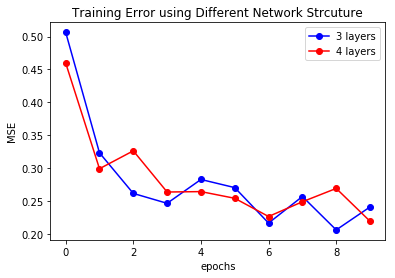

In [0]:
file_name1 = '/content/gdrive/My Drive/prj1_keypoints/train_loss_4layers.npy'
loss1 = np.load(file_name1)

file_name2 = '/content/gdrive/My Drive/prj1_keypoints/train_loss_3layers.npy'
loss2 = np.load(file_name2)

plt.plot(np.mean(loss1.reshape(-1, 10), axis=1), 'b-o')
plt.plot(np.mean(loss2.reshape(-1, 10), axis=1), 'r-o')
plt.legend({"4 layers", '3 layers'})
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("Training Error using Different Network Strcuture")
plt.savefig(os.path.join(gdrive_path, 'mse_dft_nn_structure.jpg'))

In [0]:
def loss_per_epoch(fname_batch_loss, n_total_samples, batch_size):
    loss_per_batch = np.load(fname_batch_loss)

    n_batches_per_epoch = np.ceil(n_total_samples / batch_size).astype(int)

    loss_per_epoch = []
    i = 0
    while i < loss_per_batch.shape[0]:
        if i + n_batches_per_epoch <= loss_per_batch.shape[0]:
            lossp = np.mean(loss_per_batch[i:i+n_batches_per_epoch])
            i += n_batches_per_epoch
        else:
            lossp = np.mean(loss_per_batch[i:])
            break
        loss_per_epoch.append(lossp)

    return loss_per_epoch

In [0]:
# ========================================
## Case 1: Batch size = 10
# ========================================

fname_batch_loss = '/content/gdrive/My Drive/prj1_keypoints/train_loss_batch10.npy'
n_total_samples = 3462
loss_hist = loss_per_epoch(fname_batch_loss, n_total_samples, batch_size=10)

# plt.plot(loss_hist)
# plt.xlabel('Epoch')
# plt.ylabel('1000 x MSE')

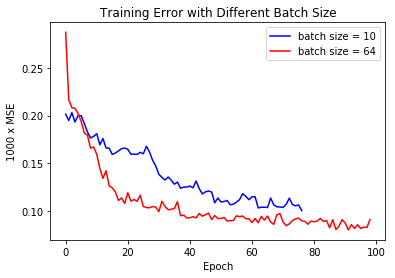

In [0]:
# ========================================
## Case 2: Batch size = 64
# ========================================

fname_batch_loss = '/content/gdrive/My Drive/prj1_keypoints/train_loss_batch64.npy'
n_total_samples = 3462
loss_hist2 = loss_per_epoch(fname_batch_loss, n_total_samples, batch_size=64)

plt.plot(loss_hist, 'b')
plt.plot(loss_hist2, 'r')
plt.xlabel('Epoch')
plt.ylabel('1000 x MSE')
plt.legend({'batch size = 10', 'batch size = 64'})
plt.title('Training Error with Different Batch Size')

plt.savefig(os.path.join(gdrive_path, 'mse_vs_batch_size.jpg'))

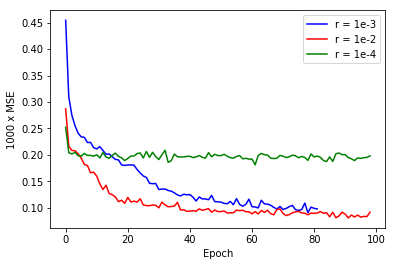

In [0]:
# ========================================
## Case 3: Batch size = 64. learning rate = 1e-4
# ========================================
import numpy as np

fname_batch_loss = '/content/gdrive/My Drive/prj1_keypoints/train_loss_lr_1e-4.npy'
n_total_samples = 3462
loss_hist = loss_per_epoch(fname_batch_loss, n_total_samples, batch_size=64)

fname_batch_loss = '/content/gdrive/My Drive/prj1_keypoints/train_loss_batch64.npy'
loss_lr_default = loss_per_epoch(fname_batch_loss, n_total_samples, batch_size=64)

fname_batch_loss = '/content/gdrive/My Drive/prj1_keypoints/train_loss_lr_1e-2.npy'
loss_lr_2 = loss_per_epoch(fname_batch_loss, n_total_samples, batch_size=64)

plt.plot(loss_hist, 'b')
plt.plot(loss_lr_default, 'r')
plt.plot(loss_lr_2, 'g')
plt.xlabel('Epoch')
plt.ylabel('1000 x MSE')
plt.legend({'r = 1e-4', 'r = 1e-3', 'r = 1e-2'})
plt.savefig(os.path.join(gdrive_path, 'mse_learning_rate.jpg'))

## 5. Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [0]:
# I add this cell to load the pre-trained model: 
model_path = '/content/gdrive/My Drive/prj1_keypoints/train_loss_lr_1e-2.pt'
checkpoint = torch.load(model_path)

net.load_state_dict(checkpoint['model_state_dict'])
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout2d(p=0.1, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout2d(p=0.2, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop3): Dropout2d(p=0.3, inplace=False)
  (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop4): Dropout2d(p=0.4, inplace=False)
  (fc1): Linear(in_features=43264, out_features=256, bias=True)
  (drop5): Dropout2d(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (drop6): Dropout2d(p=0.6, inplace=False)
  (fc3): Linear(in_fe

In [0]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([64, 1, 224, 224])
torch.Size([64, 68, 2])
torch.Size([64, 68, 2])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [0]:
def untransform_keypoints(output_pnts):
    # Convert the output from the neural network back into meaningful point locations
    
    output_pnts = output_pnts.view(output_pnts.size()[0], 68, -1)
    output_pnts = output_pnts.data
    output_pnts = output_pnts.numpy()
    # print(output_pnts.shape)
    output_pnts = output_pnts * 50. + 100.
    
    return output_pnts

In [0]:
# untransform_keypoints(test_outputs[0])

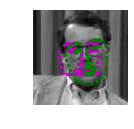

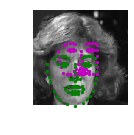

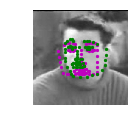

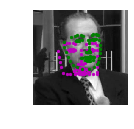

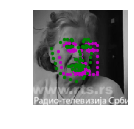

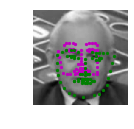

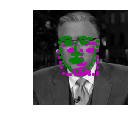

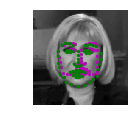

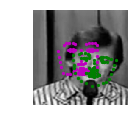

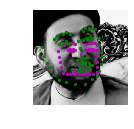

In [0]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)

Once you've found a good model (or two), save your model so you can load it and use it later!

In [0]:
## TODO: change the name to something uniqe for each new model
# model_dir = 'saved_models/'
model_dir = gdrive_path
model_name = 'keypoints_model_1.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: 
In this project, Adam (ADAptive Moment estimation) optimier was used for optimization. Adam optimizer combines the advantages of Adaptive Gradient Algorithm and Root Mean Square Propagation (RMSProp), which make the change of weights adaptive in different parameter direction. 

The Mean Square Error (MSE) was used as the loss function. Keypoint prediction is a regression problem with a target variable continuous in the range of (-1, 1) (after normalization). MSE is able to capture the model accuracy by taking into account the distance between the observations and the estiamtes.  

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: 
I started with a network made up of three convolutional layers followed by two fully connected (FC) layers. Later, I added one more convolutioon layer and one more FC layer, and add max pooling layer and dropout layer after each convolution layer. A summary of the network configuration is as the following:

```
Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout2d(p=0.1, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout2d(p=0.2, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop3): Dropout2d(p=0.3, inplace=False)
  (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop4): Dropout2d(p=0.4, inplace=False)
  (fc1): Linear(in_features=43264, out_features=256, bias=True)
  (drop5): Dropout2d(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (drop6): Dropout2d(p=0.6, inplace=False)
  (fc3): Linear(in_features=256, out_features=136, bias=True)
)
```



To avoid overfitting, additional drop-out layers were applied after the max-pooling (for the convolutional layers) and after the activation layers (for the fully-connected layers). The drop-out rate (percentage of weights to be zeroed) increased from 0.1 in the first layer to 0.5 to the last layer.

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: I experimented different batch size and found that the loss converged faster to the minimum when the batch size was 64 (compared with a batch size of 10). The maximum number of epoches was set to be 100 as the loss does not change much after 100 epoches.    

## 6. Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[ 0.01568463 -0.01187259  0.0655783   0.10778157 -0.14298102]
 [-0.03667989  0.03631062  0.03718168 -0.1463554  -0.16609268]
 [-0.15301849 -0.20291583 -0.23966706 -0.02251185  0.09229859]
 [-0.11624502 -0.03497806  0.10291873  0.07981873 -0.2165847 ]
 [-0.00517659 -0.14390753  0.08552428 -0.00303818  0.04910647]]
(5, 5)


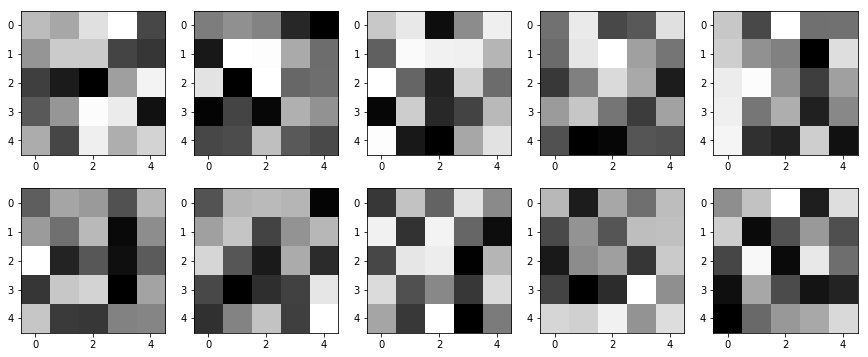

In [0]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0
print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(w[i][0], cmap='gray')

## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

(1, 224, 224)
The min value: 0.05882353
The max value: 0.9372549


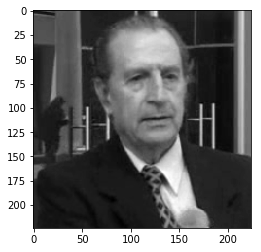

In [0]:
##TODO: load in and display any image from the transformed test dataset
img_index = 3
# img_sample = test_images[img_index][0]
# print(img_sample.shape)
# print(type(img_sample))

image = test_images[img_index].data   # get the image from it's wrapper
image = image.numpy()   # convert to numpy array from a Tensor

print(image.shape)
print("The min value:", np.amin(image))
print("The max value:", np.amax(image))
plt.imshow(image[0], cmap='gray')


## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image

In [0]:
import cv2

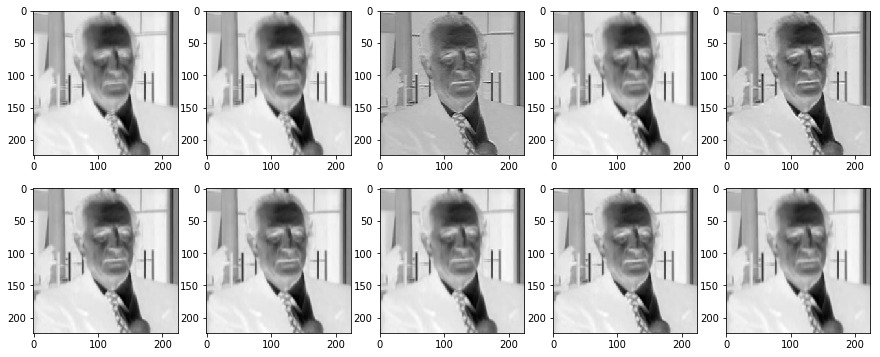

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
for ind, ax in enumerate(axes.flat):
    filtered = cv2.filter2D(src=image, ddepth=-1, kernel=w[ind][0])
    ax.imshow(filtered[0], cmap='gray')

In [0]:
w.shape

(32, 1, 5, 5)

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: (does it detect vertical lines or does it blur out noise, etc.) write your answer here

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!